In [1]:
import ipywidgets as widgets

print(widgets.__version__)

8.1.1


In [2]:
#%matplotlib inline

### 1. Load Dataset 

In [3]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df["WineType"] = [wine.target_names[t] for t in wine.target]

ingredients = wine.feature_names

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [4]:
list(wine_df.columns)
# wine.target_names


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'WineType']

### 2. Link Widgets with Matplotlib Chart

#### 2.1 Way 1

In [5]:
import matplotlib.pyplot as plt

color_map = { "class_0": "tomato", "class_1": "dodgerblue", "class_2": "lime"}

def create_scatter_chart(ing1, ing2, color_encode):
    with plt.style.context("fivethirtyeight"):
        fig = plt.figure(figsize=(8,5))

        if color_encode:
            for c_type in wine_df.WineType.unique():
                plt.scatter(x=wine_df[wine_df.WineType==c_type][ing1], y=wine_df[wine_df.WineType==c_type][ing2], c=color_map[c_type], edgecolors="black", s=70, label=c_type)

            plt.legend(loc="best")
        else:
            plt.scatter(x=wine_df[ing1], y=wine_df[ing2], c="dodgerblue", edgecolors="black", s=70)

        plt.xlabel(ing1.capitalize())
        plt.ylabel(ing2.capitalize())
        plt.title("{} vs {}".format(ing1[:10].capitalize(), ing2[:10].capitalize()), loc="left", fontsize=15, fontweight="bold")
        plt.show()

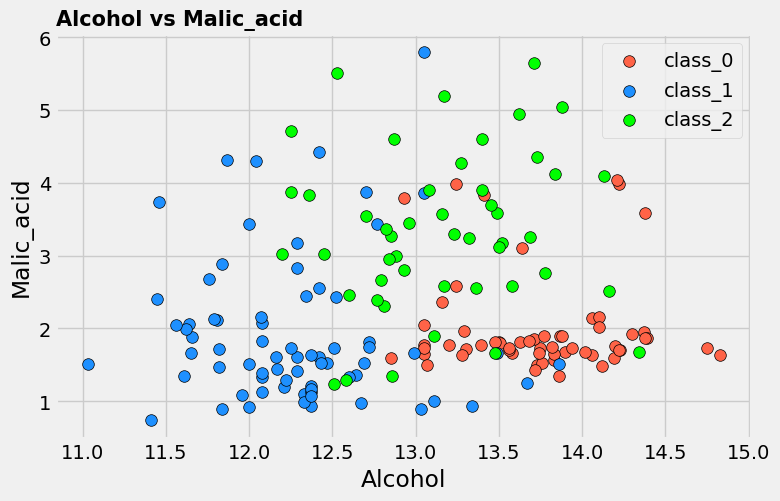

In [6]:
create_scatter_chart("alcohol", "malic_acid", True)

In [7]:
drop1 = widgets.Dropdown(description="X-Axis", options=ingredients, index=0)
drop2 = widgets.Dropdown(description="Y-Axis", options=ingredients, index=1)
color_encode = widgets.Checkbox(description="Color_Encode")

In [8]:
scatter_chart = widgets.interactive_output(create_scatter_chart, { "ing1": drop1, "ing2": drop2, "color_encode": color_encode})

type(scatter_chart)

ipywidgets.widgets.widget_output.Output

In [9]:
widgets.VBox([widgets.HBox([drop1, drop2]), color_encode, scatter_chart])

#### 2.2 Way 2

In [10]:
drop1 = widgets.Dropdown(description="X-Axis", options=ingredients, index=0)
drop2 = widgets.Dropdown(description="Y-Axis", options=ingredients, index=1)
color_encode = widgets.Checkbox(description="Color_Encode")

scatter_chart = widgets.Output()

@scatter_chart.capture(clear_output=True, wait=True)
def update_chart(change):
    create_scatter_chart(drop1.value, drop2.value, color_encode.value)

drop1.observe(update_chart, names="value")
drop2.observe(update_chart, names="value")
color_encode.observe(update_chart, names="value")

In [11]:
widgets.VBox([widgets.HBox([drop1, drop2]), color_encode, scatter_chart])